In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.cluster import KMeans

In [3]:
#Data Exploration - loading & explore data, check for missing values or inconsistencies in data.add()
df = pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
df.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
cleaned_df = df.dropna()
cleaned_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [10]:
df['InvoiceNo'].unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [11]:
row = df.iloc[541880:541888]
row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541880,581585,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:31:00,3.75,15804.0,United Kingdom
541881,581585,16016,LARGE CHINESE STYLE SCISSOR,10,2011-12-09 12:31:00,0.85,15804.0,United Kingdom
541882,581585,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541884,581585,84946,ANTIQUE SILVER T-LIGHT GLASS,12,2011-12-09 12:31:00,1.25,15804.0,United Kingdom
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,2011-12-09 12:31:00,0.85,15804.0,United Kingdom
541886,581585,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541887,581585,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,2011-12-09 12:31:00,3.75,15804.0,United Kingdom


In [12]:
customerID = list(df['CustomerID'])
customerID

[17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 13047.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 12583.0,
 13748.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 15100.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 17850.0,
 15291.0,
 15291.0,
 17850.0,
 17850.0,
 14688.0,
 14688.0,
 14688.0,
 14688.0,
 14688.0,
 14688.0,
 14688.0,
 14688.0,
 14688.0,
 14688.0,
 14688.0,
 14688.0,
 14688.0,
 14688.0,


In [13]:
columns = df[[ 'StockCode', 'Description']]
columns

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS
541905,22899,CHILDREN'S APRON DOLLY GIRL
541906,23254,CHILDRENS CUTLERY DOLLY GIRL
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE


In [14]:
#Data Preprocessing - handling missing values, converting data types to numeric

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [15]:
columns = df[['Country', 'Quantity']]
columns

,Country,Quantity
0,United Kingdom,6
1,United Kingdom,6
2,United Kingdom,8
3,United Kingdom,6
4,United Kingdom,6
...,...,...
541904,France,12
541905,France,6
541906,France,4
541907,France,4


In [16]:
zero_quantity = df['Quantity'] == 0
countries_0_quantity = df.loc[zero_quantity, 'Country']
countries_0_quantity

Series([], Name: Country, dtype: object)

In [17]:
zero_quantity = df['Quantity'] >= 0
countries_0_quantity = df.loc[zero_quantity, 'Country']
countries_0_quantity

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
541904            France
541905            France
541906            France
541907            France
541908            France
Name: Country, Length: 531285, dtype: object

In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df = df.drop_duplicates(subset=['CustomerID', 'InvoiceNo'], keep = 'first')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom
47,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom


In [22]:
df.loc[:, 'Total'] = df['Quantity'] * df['UnitPrice']
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.1


In [27]:
#Analysis, counting, aggregate & filtering

df.loc[:, 'InvoiceYear'] = df['InvoiceDate'].dt.year
annual_sales = df.groupby('InvoiceYear')['Total'].sum()
annual_sales

InvoiceYear
2010     25719.91
2011    561574.75
Name: Total, dtype: float64

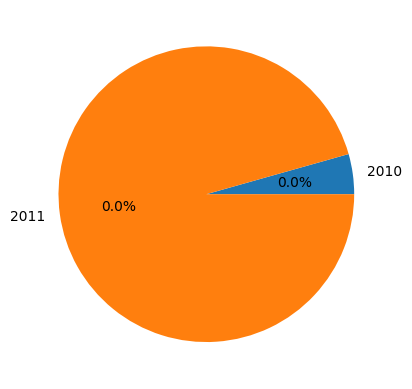

In [33]:
total_sales = annual_sales.sum()
plt.pie(annual_sales.values, labels=annual_sales.index, autopct=lambda x: '{:.1f}%'.format(x/total_sales*100))
plt.show()

In [29]:
df = df.assign(Profit=(df['UnitPrice'] * 0.25) * df['Quantity'])
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvoiceYear,Profit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,3.825
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,2.775
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010,13.520


In [30]:
df.loc[:, 'InvoiceYear'] = df['InvoiceDate'].dt.year
annual_profit = df.groupby('InvoiceYear')['Profit'].sum()
annual_profit

InvoiceYear
2010      6429.9775
2011    140393.6875
Name: Profit, dtype: float64

<Axes: title={'center': 'Average Profit per Year'}, xlabel='Year', ylabel='Annual Profit'>

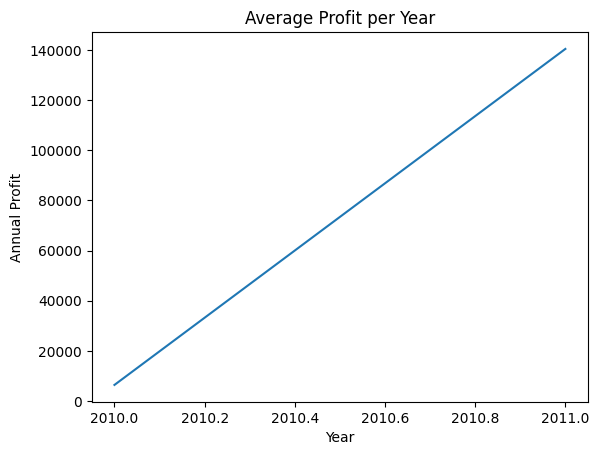

In [31]:
annual_profit.plot(xlabel = 'Year', ylabel = 'Annual Profit', title = 'Average Profit per Year')

In [37]:
df.loc[:, 'InvoiceYear'] = df['InvoiceDate'].dt.year
quantity_sold = df.groupby('InvoiceYear')['Quantity'].sum()
quantity_sold

InvoiceYear
2010     27534
2011    334318
Name: Quantity, dtype: int64

<Axes: title={'center': 'Average Quantity Sold per Year'}, xlabel='Year', ylabel='Quantity Sold'>

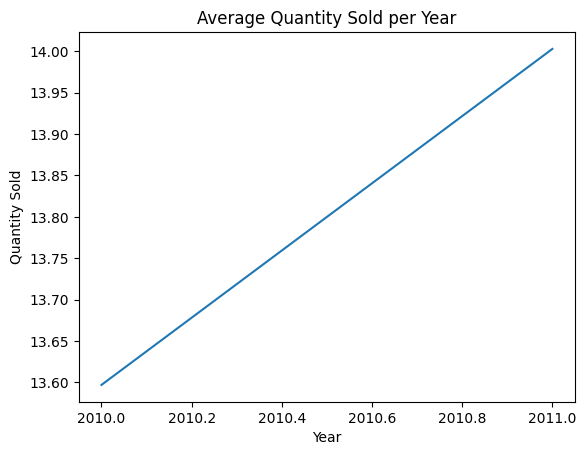

In [38]:
quantity_sold = df.groupby('InvoiceYear')['Quantity'].mean()
quantity_sold.plot(xlabel='Year',ylabel='Quantity Sold',title='Average Quantity Sold per Year')

In [44]:
#Calculate Average Order Value (AOV): the total revenue by the number of orders.add()

aov = df['Total'].sum() / df['Quantity'].sum()
print('Average Order Value:', aov)

Average Order Value: 1.6230244962028673


In [45]:
#CLV = (Customer Value * Average Customer Lifespan)

Avg_Customer_Lifespan = 5
df['no_customer'] = df['CustomerID'].count()
customer_value = df['Total'].sum() / df['no_customer'].sum()
clv = customer_value * Avg_Customer_Lifespan
print('Customer Lifespan Value:', clv)

Customer Lifespan Value: 0.0051093892514802825


<Axes: xlabel='Year'>

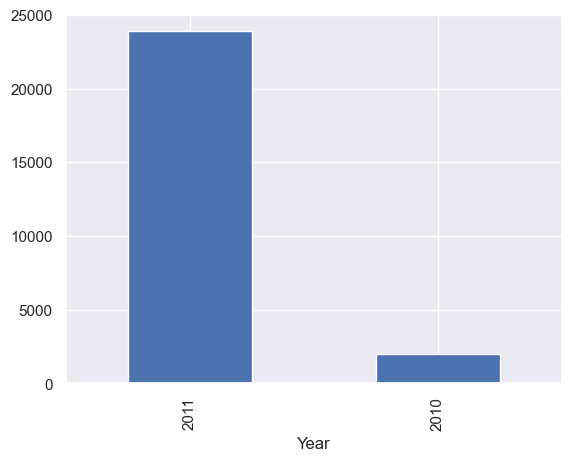

In [46]:
df['Year'] = df['InvoiceDate'].dt.year
df['Year'].value_counts().plot(kind = 'bar')

In [6]:
import pandas as pd
import plotly.express as px

df2 = pd.read_excel('Online Retail.xlsx')

In [7]:
df2.drop_duplicates(subset = ['CustomerID', 'InvoiceNo'], keep = 'first')
df2['InvoiceYear'] = df2['InvoiceDate'].dt.year
no_customer = df2.groupby('InvoiceYear')['CustomerID'].sum()
no_customer

InvoiceYear
2010    4.166977e+08
2011    5.802778e+09
Name: CustomerID, dtype: float64

In [8]:
no_customer = df2.groupby('InvoiceYear')['CustomerID'].sum()
nfig = px.pie(
    no_customer,
    values=no_customer.values,
    names=no_customer.index,
    labels={year: f"Year {year}" for year in no_customer.index},
    hole=0.4
    
)
nfig

In [10]:
df2.loc[:, 'Total'] = df2['Quantity'] * df2['UnitPrice']
df2.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34


In [13]:
customers_expense = df2[df2['Total']<10]
customers_expense

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,Total
13,536367,22310,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047.0,United Kingdom,2010,9.90
53,536373,37370,RETRO COFFEE MUGS ASSORTED,6,2010-12-01 09:02:00,1.06,17850.0,United Kingdom,2010,6.36
54,536373,21871,SAVE THE PLANET MUG,6,2010-12-01 09:02:00,1.06,17850.0,United Kingdom,2010,6.36
55,536373,21071,VINTAGE BILLBOARD DRINK ME MUG,6,2010-12-01 09:02:00,1.06,17850.0,United Kingdom,2010,6.36
56,536373,21068,VINTAGE BILLBOARD LOVE/HATE MUG,6,2010-12-01 09:02:00,1.06,17850.0,United Kingdom,2010,6.36
...,...,...,...,...,...,...,...,...,...,...
541859,581580,37500,TEA TIME TEAPOT IN GIFT BOX,1,2011-12-09 12:20:00,4.95,12748.0,United Kingdom,2011,4.95
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom,2011,4.68
541870,581585,22915,ASSORTED BOTTLE TOP MAGNETS,24,2011-12-09 12:31:00,0.19,15804.0,United Kingdom,2011,4.56
541881,581585,16016,LARGE CHINESE STYLE SCISSOR,10,2011-12-09 12:31:00,0.85,15804.0,United Kingdom,2011,8.50


In [54]:
from sklearn.tree import DecisionTreeRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
import pmdarima as pm
from sklearn.tree import DecisionTreeRegressor

In [14]:
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
df2['InvoiceDate'] = df2['InvoiceDate'].dt.date
df2.index = pd.to_datetime(df2['InvoiceDate'])

In [15]:
df2.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,Total
InvoiceDate,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010,15.30
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010,20.34


In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df2 = pd.read_excel('Online Retail.xlsx')
df2= df2.assign(Profit=(df2['UnitPrice'] * 0.25) * df2['Quantity'])
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Profit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3.825
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5.085
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5.500


In [12]:
df2['Profit'] = pd.to_numeric(df2['Profit'], errors='coerce').fillna(0)
y = df2['Profit']
X = df2[['Quantity', 'UnitPrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')
print(f'R-squared score: {r2:.2f}')

Mean squared error: 3152.88
R-squared score: 0.85


In [47]:
mse = np.mean((y_test - predicted_test)**2)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: nan


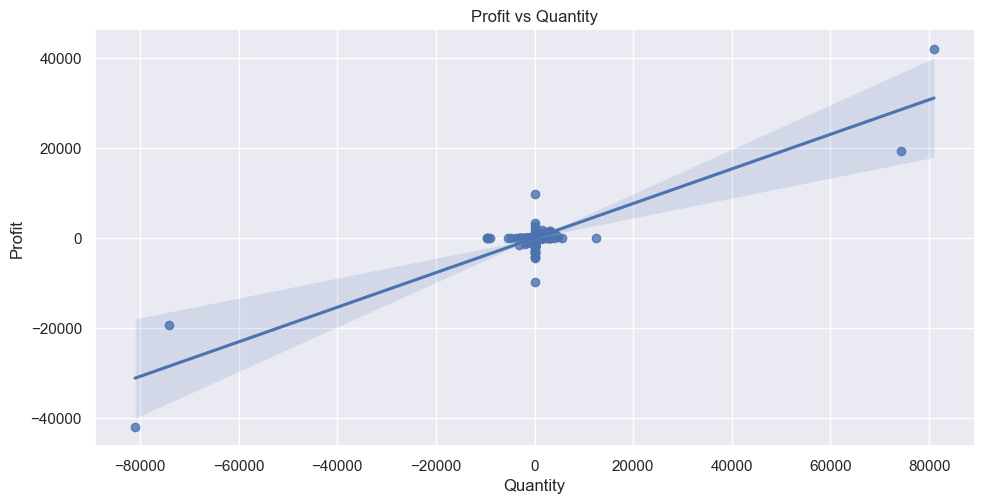

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of Quantity vs Profit
sns.set_theme(style="darkgrid")
sns.lmplot(x='Quantity', y='Profit', data=df2, height=5, aspect=2)


plt.title('Profit vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Profit')

plt.show()

In [19]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.tree import DecisionTreeRegressor

In [26]:
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
df2['InvoiceDate'] = df2['InvoiceDate'].dt.date
df2.index = pd.to_datetime(df2['InvoiceDate'])

In [30]:
df2.index.unique()

DatetimeIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-05',
               '2010-12-06', '2010-12-07', '2010-12-08', '2010-12-09',
               '2010-12-10', '2010-12-12',
               ...
               '2011-11-29', '2011-11-30', '2011-12-01', '2011-12-02',
               '2011-12-04', '2011-12-05', '2011-12-06', '2011-12-07',
               '2011-12-08', '2011-12-09'],
              dtype='datetime64[ns]', name='InvoiceDate', length=305, freq=None)

In [32]:
train_start = pd.to_datetime('2010-12-01')
train_end = pd.to_datetime('2011-11-30')

test_start = pd.to_datetime('2011-12-01')
test_end = pd.to_datetime('2011-12-09')

forecast_start = pd.to_datetime('2012-05-01')
forecast_end = pd.to_datetime('2012-05-31')

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

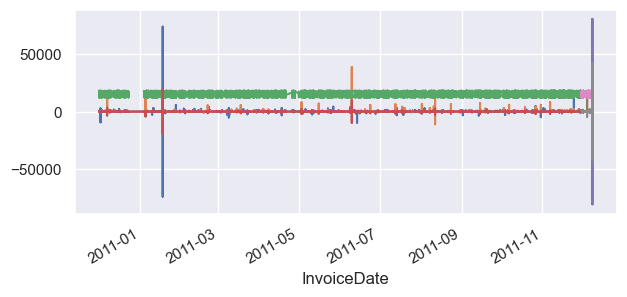

In [40]:
fig, ax = plt.subplots(figsize=(7, 3))
df2.loc[train_start:train_end].plot(ax=ax, label = "Train")
df2.loc[test_start:test_end].plot(ax=ax, label = "Test")
ax.legend().remove()

In [41]:
# Define the forecaster
forecaster = ForecasterAutoreg(
    # Add the sklearn regressor and lags
    regressor = DecisionTreeRegressor(random_state = 28),
    lags = 10
)

# Fit the model using train data
y_train = df2.loc[train_start:train_end, 'Profit'].reset_index(drop=True)
y_test = df2.loc[test_start:test_end, 'Profit'].reset_index(drop=True)
forecaster.fit(y = y)

# Predict the test period
test_start_index = df2.index.get_loc(test_start)
test_end_index = df2.index.get_loc(test_end)

test_data = df2.loc[test_start:test_end, 'Profit']
test_data = test_data.reset_index(drop=True)
predicted_test = forecaster.predict(steps = len(test_data))
predicted_test

541909    1.660000
541910    4.335000
541911    3.150000
541912    4.875000
541913    2.490000
            ...   
567429    0.970625
567430    0.970625
567431    0.970625
567432    0.970625
567433    0.970625
Name: pred, Length: 25525, dtype: float64

In [48]:
mse = np.mean((y_test - predicted_test)**2)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: nan


In [50]:
mean_x = np.mean(X_train, axis=0)
std_x = np.std(X_train, axis=0)
X_train_norm = (X_train - mean_x) / std_x
X_test_norm = (X_test - mean_x) / std_x
X_train_norm

,Quantity,UnitPrice
431701,-0.020460,0.003050
293936,0.013729,-0.034159
64358,0.082108,-0.038182
174874,-0.043253,0.073446
280634,0.515175,-0.032148
...,...,...
110268,-0.037555,-0.034159
259178,0.013729,-0.017063
365838,-0.048951,-0.005196
131932,-0.048951,-0.032148


In [51]:
X_test_norm

,Quantity,UnitPrice
209268,0.082108,-0.038182
207108,-0.031857,0.023163
167085,-0.031857,-0.040193
471836,-0.037555,-0.027119
115865,-0.043253,0.053333
...,...,...
316739,-0.043253,-0.038383
404752,0.173280,0.038751
261850,-0.009064,-0.030136
530124,0.082108,-0.044819


In [52]:
y_test_denorm = y_test * std_x + mean_x
y_test_denorm


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
             ..
25522       NaN
25523       NaN
25524       NaN
Quantity    NaN
UnitPrice   NaN
Length: 25527, dtype: float64

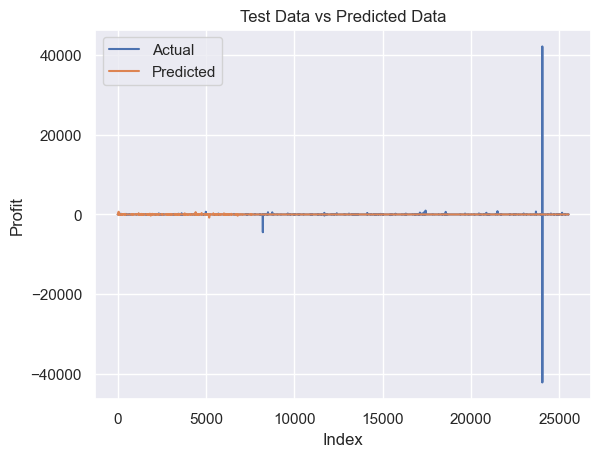

In [45]:
sns.lineplot(x=range(len(test_data)), y=test_data, label='Actual')
sns.lineplot(x=range(len(predicted_test)), y=predicted_test, label='Predicted')
plt.legend()
plt.title('Test Data vs Predicted Data')
plt.xlabel('Index')
plt.ylabel('Profit')
plt.show()